In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [322]:
pd.pandas.set_option('display.max_columns', 100)
pd.pandas.set_option('display.max_rows', 100)

df = pd.read_csv(r'C:\Users\Shivam kumar\Desktop\PROJECT\Customer Categorization\Customer-Categorization\Notebook\marketing_campaign.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [323]:
df.shape

(2240, 29)

In [324]:
# DATA CLEANING
#1. Missing Values
#2. Duplicates
#3. Check datatypes
#. Understanding the dataset

In [325]:
# Checking for missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [326]:
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>0]

In [327]:
df[features_with_na].select_dtypes(exclude=['object']).describe()

,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000


In [328]:
# Imputing the missing values with mean
df['Income'] = df['Income'].fillna(df['Income'].median())

In [329]:
# Duplicates
df.duplicated().sum()

np.int64(0)

In [330]:
# dropin z_costContact and z_revenue as they do not add any value to our analysis because they are constant
droping_columns = ['ID','Z_CostContact', 'Z_Revenue']
for column in droping_columns:
    df.drop(column,inplace=True,axis=1)
    print(f"{column} dropped successfully")

ID dropped successfully
Z_CostContact dropped successfully
Z_Revenue dropped successfully


**FEATURE ENGINEERING**

In [331]:
from datetime import datetime

raw_df = df.copy()
df['Age'] = 2026 - df['Year_Birth'] # Assuming the current year is 2026 and finding the age of customers
df['Education']=df['Education'].replace({'Basic':0, '2n Cycle':1, 'Graduation':2, 'Master':3, 'PhD':4}).astype(int) # Encoding the education column into numerical values
df['Marital_Status']=df['Marital_Status'].replace({'Single':0, 'Divorced':0, 'Widow':0, 'Alone':0, 'Absurd':0, 'YOLO':0, 'Married':1, 'Together':1}).astype(int) # Encoding the marital status column into numerical values
df['Children'] = df['Kidhome'] + df['Teenhome'] # Creating a new column 'Children' by summing 'Kidhome' and 'Teenhome'
df['Family_Size'] = df['Children'] + 1 # Creating a new column 'Family_Size' by adding 1 (for the customer) to 'Children'

df['Total_Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'] # Creating a new column 'Total_Spending' by summing all the spending columns
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebVisitsMonth'] # Creating a new column 'Total_Purchases' by summing all the purchase columns
df['Total Promo'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] # Creating a new column 'Total_Promo' by summing all the promotional response columns

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y') # Converting 'Dt_Customer' column to datetime format
today = datetime.today()

df['Days_as_Customer'] = (today - df['Dt_Customer']).dt.days # Creating a new column 'Days_as_Customer' by calculating the difference between today and 'Dt_Customer' in days
df['Offers_Responding_To'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response'] # Creating a new column 'Offers_Responding_To' by summing all the accepted campaign columns and 'Response'
df['Parental Status'] = np.where(df['Children'] >= 1, 1, 0) # Creating a new column 'Parental_Status' to indicate if the customer has children or not

df.drop(columns=['Year_Birth', 'Kidhome', 'Teenhome'], inplace=True)
df.rename(columns={"Marital_Status": "Marital Status","MntWines": "Wines","MntFruits":"Fruits",
                   "MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets",
                   "MntGoldProds":"Gold","NumWebPurchases": "Web","NumCatalogPurchases":"Catalog",
                   "NumStorePurchases":"Store","NumDealsPurchases":"Discount Purchases"},
          inplace = True)


df = df[["Age","Education","Marital Status","Parental Status","Children","Income","Total_Spending","Days_as_Customer","Recency","Wines","Fruits","Meat","Fish","Sweets","Gold","Web","Catalog","Store","Discount Purchases","Total Promo","NumWebVisitsMonth"]]

In [332]:
df.dtypes

Age                     int64
Education               int64
Marital Status          int64
Parental Status         int64
Children                int64
Income                float64
Total_Spending          int64
Days_as_Customer        int64
Recency                 int64
Wines                   int64
Fruits                  int64
Meat                    int64
Fish                    int64
Sweets                  int64
Gold                    int64
Web                     int64
Catalog                 int64
Store                   int64
Discount Purchases      int64
Total Promo             int64
NumWebVisitsMonth       int64
dtype: object

In [333]:
# Numerical Features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("Numerical Features: ", numerical_features)
print("\nNumber of Numerical Features: ", len(numerical_features))

Numerical Features:  ['Age', 'Education', 'Marital Status', 'Parental Status', 'Children', 'Income', 'Total_Spending', 'Days_as_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Web', 'Catalog', 'Store', 'Discount Purchases', 'Total Promo', 'NumWebVisitsMonth']

Number of Numerical Features:  21


In [334]:
# Categorical Features
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Categorical Features: ", categorical_features)
print("\nNumber of Categorical Features: ", len(categorical_features))

Categorical Features:  []

Number of Categorical Features:  0


In [335]:
# Discrete Features
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<=25]
print("Discrete Features: ", discrete_features)
print("\nNumber of Discrete Features: ", len(discrete_features))

Discrete Features:  ['Education', 'Marital Status', 'Parental Status', 'Children', 'Web', 'Catalog', 'Store', 'Discount Purchases', 'Total Promo', 'NumWebVisitsMonth']

Number of Discrete Features:  10


In [336]:
# Continuous Features
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
print("Continuous Features: ", continuous_features)
print("\nNumber of Continuous Features: ", len(continuous_features))

Continuous Features:  ['Age', 'Income', 'Total_Spending', 'Days_as_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']

Number of Continuous Features:  11


In [337]:
# Checking Outleirs and capturing them
def outlier_detection(df, feature):
    print(f"\nOutlier detection for feature: {feature}")
    Q1 = df[feature].quantile(0.25)
    print(f"percentile25 for {feature}: {Q1}")
    Q3 = df[feature].quantile(0.75)
    print(f"percentile75 for {feature}: {Q3}")
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    print(f"lower_bound for {feature}: {lower_bound}")
    upper_bound = Q3 + 1.5 * IQR
    print(f"upper_bound for {feature}: {upper_bound}")
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

In [338]:
for feature in continuous_features:
    outliers = outlier_detection(df, feature)
    print(f"Number of outliers in {feature}: {outliers.shape[0]}")


Outlier detection for feature: Age
percentile25 for Age: 49.0
percentile75 for Age: 67.0
lower_bound for Age: 22.0
upper_bound for Age: 94.0
Number of outliers in Age: 3

Outlier detection for feature: Income
percentile25 for Income: 35538.75
percentile75 for Income: 68289.75
lower_bound for Income: -13587.75
upper_bound for Income: 117416.25
Number of outliers in Income: 8

Outlier detection for feature: Total_Spending
percentile25 for Total_Spending: 68.75
percentile75 for Total_Spending: 1045.5
lower_bound for Total_Spending: -1396.375
upper_bound for Total_Spending: 2510.625
Number of outliers in Total_Spending: 3

Outlier detection for feature: Days_as_Customer
percentile25 for Days_as_Customer: 4413.75
percentile75 for Days_as_Customer: 4762.0
lower_bound for Days_as_Customer: 3891.375
upper_bound for Days_as_Customer: 5284.375
Number of outliers in Days_as_Customer: 0

Outlier detection for feature: Recency
percentile25 for Recency: 24.0
percentile75 for Recency: 74.0
lower_bou

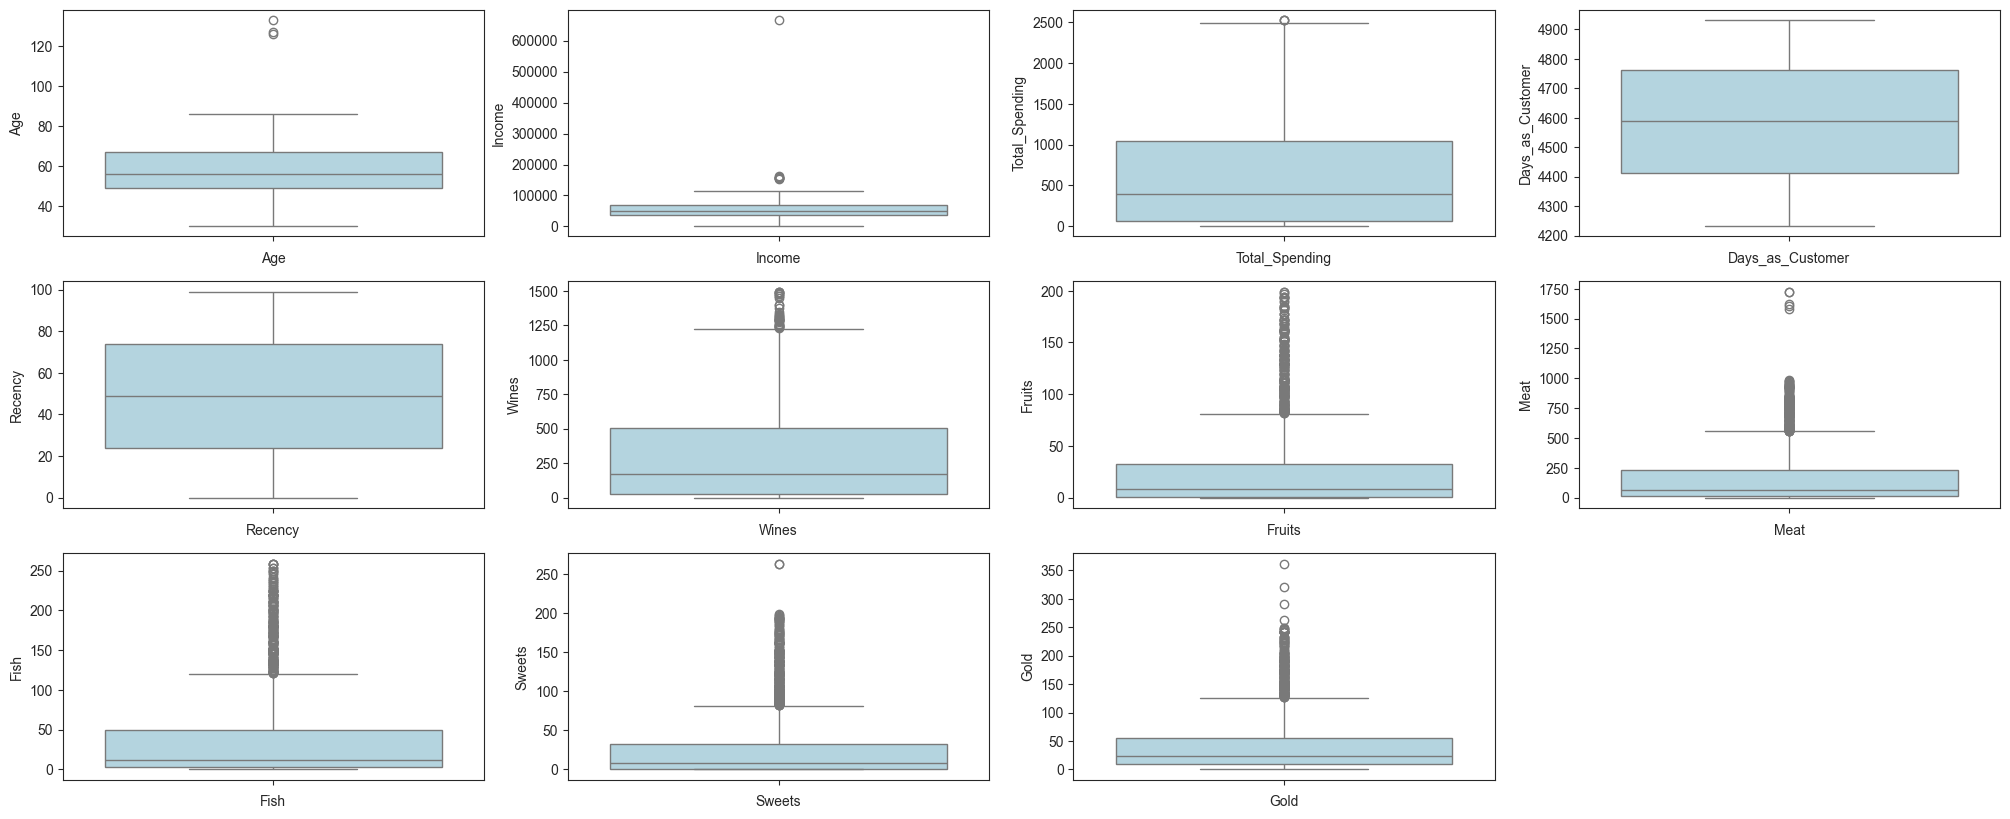

In [339]:
# plotting boxplots for continuous features to visualize outliers
plt.figure(figsize=(25,10))
for i, feature in enumerate(continuous_features):
    plt.subplot(3,4,i+1)
    sns.set_style('ticks')
    plt.xlabel(feature)
    ax =sns.boxplot(y=df[feature], color='lightblue')
    

In [340]:
# caping the outliers
for feature in continuous_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
    df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])

In [341]:
for feature in continuous_features:
    outliers = outlier_detection(df, feature)
    print(f"Number of outliers in {feature}: {outliers.shape[0]}")


Outlier detection for feature: Age
percentile25 for Age: 49.0
percentile75 for Age: 67.0
lower_bound for Age: 22.0
upper_bound for Age: 94.0
Number of outliers in Age: 0

Outlier detection for feature: Income
percentile25 for Income: 35538.75
percentile75 for Income: 68289.75
lower_bound for Income: -13587.75
upper_bound for Income: 117416.25
Number of outliers in Income: 0

Outlier detection for feature: Total_Spending
percentile25 for Total_Spending: 68.75
percentile75 for Total_Spending: 1045.5
lower_bound for Total_Spending: -1396.375
upper_bound for Total_Spending: 2510.625
Number of outliers in Total_Spending: 0

Outlier detection for feature: Days_as_Customer
percentile25 for Days_as_Customer: 4413.75
percentile75 for Days_as_Customer: 4762.0
lower_bound for Days_as_Customer: 3891.375
upper_bound for Days_as_Customer: 5284.375
Number of outliers in Days_as_Customer: 0

Outlier detection for feature: Recency
percentile25 for Recency: 24.0
percentile75 for Recency: 74.0
lower_bou

In [342]:
# capped successfully

** FEATURE SCALING**

In [343]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
outlier_features = ["Wines","Fruits","Meat","Fish","Sweets","Gold","Age","Total_Spending"] #we can find the columns which has oitliers in the EDA
numeric_features = [x for x in numeric_features if x not in outlier_features]

In [344]:
df[numeric_features].dtypes

Education               int64
Marital Status          int64
Parental Status         int64
Children                int64
Income                float64
Days_as_Customer      float64
Recency               float64
Web                     int64
Catalog                 int64
Store                   int64
Discount Purchases      int64
Total Promo             int64
NumWebVisitsMonth       int64
dtype: object

In [345]:
df[outlier_features].dtypes

Wines             float64
Fruits            float64
Meat              float64
Fish              float64
Sweets            float64
Gold              float64
Age               float64
Total_Spending    float64
dtype: object

In [346]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

dataC = df.copy()

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('StandardScaler', StandardScaler())])

outlier_features_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('transformer', PowerTransformer(standardize=True))])

preprocessor = ColumnTransformer(transformers=[
    ('Numeric Pipeline', numeric_pipeline, numeric_features),
    ('Outliers Features Pipeline', outlier_features_pipeline, outlier_features)],
    remainder='drop'
    )
columns = dataC.columns
dataC = preprocessor.fit_transform(dataC)
scaled_data = pd.DataFrame(dataC, columns=columns)
print("Scaling and Transformation completed successfully : ")
scaled_data.head()

Scaling and Transformation completed successfully : 


,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
0,-0.458383,-1.346874,-1.584605,-1.264505,0.299651,1.531185,0.307039,1.409304,2.510890,-0.550785,0.349414,-0.439037,0.693904,1.062784,1.487681,1.504406,1.493989,1.474200,1.196801,1.005653,1.315365
1,-0.458383,-1.346874,0.631072,1.396361,-0.263808,-1.190545,-0.383664,-1.110409,-0.568720,-1.166125,-0.168236,-0.439037,-0.130463,-1.211545,-1.001121,-1.376502,-0.889143,-0.987648,-0.967034,1.240167,-1.441417
2,-0.458383,0.742460,-1.584605,-1.264505,0.943420,-0.205773,-0.798086,1.409304,-0.226541,1.295237,-0.685887,-0.439037,-0.542647,0.748918,1.145877,0.456428,1.435812,0.579704,0.473642,0.360741,0.661170
3,-0.458383,0.742460,0.631072,0.065928,-1.204881,-1.061881,-0.798086,-0.750450,-0.910898,-0.550785,-0.168236,-0.439037,0.281720,-1.211545,-0.403311,-0.722233,-0.110828,-0.542753,-1.069040,-1.314741,-1.117211
4,1.533425,0.742460,0.631072,0.065928,0.307056,-0.953012,1.550305,0.329427,0.115638,0.064556,1.384715,-0.439037,-0.130463,0.123712,1.058075,0.406278,0.832291,0.741799,-0.368949,-1.033786,0.179322
